# L1 Klimov

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('mydata/data.txt', sep=",")

In [3]:
data.head()

,id,trt,sex,age,pain,time
0,101,1,2,64,0,1
1,101,1,2,64,0,2
2,101,1,2,64,0,3
3,101,1,2,64,0,4
4,101,1,2,64,0,5


In [4]:
# Размер датасета
data.shape

(246, 6)

In [5]:
# Список колонок
data.columns

Index(['id', 'trt', 'sex', 'age', 'pain', 'time'], dtype='object')

In [6]:
# Список колонок с типами данных
data.dtypes

id      int64
trt     int64
sex     int64
age     int64
pain    int64
time    int64
dtype: object

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

id - 0
trt - 0
sex - 0
age - 0
pain - 0
time - 0


In [8]:
# Основные статистические характеристки набора данных
data.describe()

,id,trt,sex,age,pain,time
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,157.146341,1.463415,1.609756,55.048780,0.983740,3.500000
std,49.578910,0.499676,0.488799,16.120897,1.255088,1.711307
min,101.000000,1.000000,1.000000,20.000000,0.000000,1.000000
25%,111.000000,1.000000,1.000000,41.000000,0.000000,2.000000
50%,121.000000,1.000000,2.000000,56.000000,0.000000,3.500000
75%,209.000000,2.000000,2.000000,66.000000,2.000000,5.000000
max,219.000000,2.000000,2.000000,82.000000,4.000000,6.000000


In [9]:
# Определим уникальные значения для целевого признака
data['time'].unique()

array([1, 2, 3, 4, 5, 6])

# Визуализация

### Диаграмма рассеивания

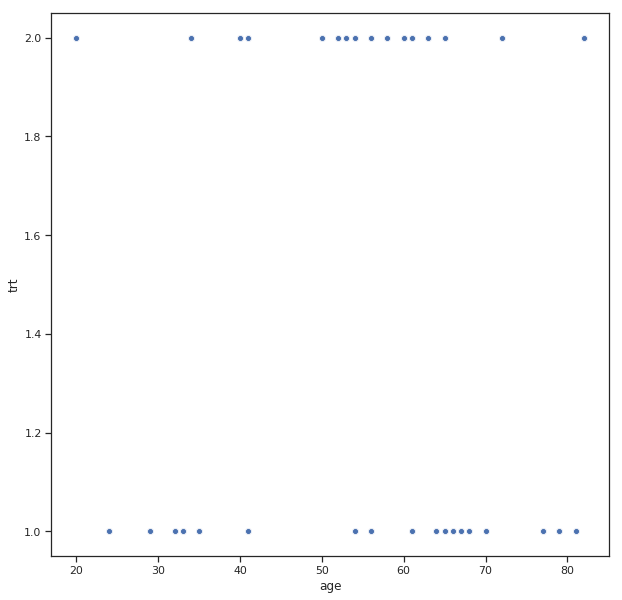

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='age', y='trt', data=data)

### Гистограмма

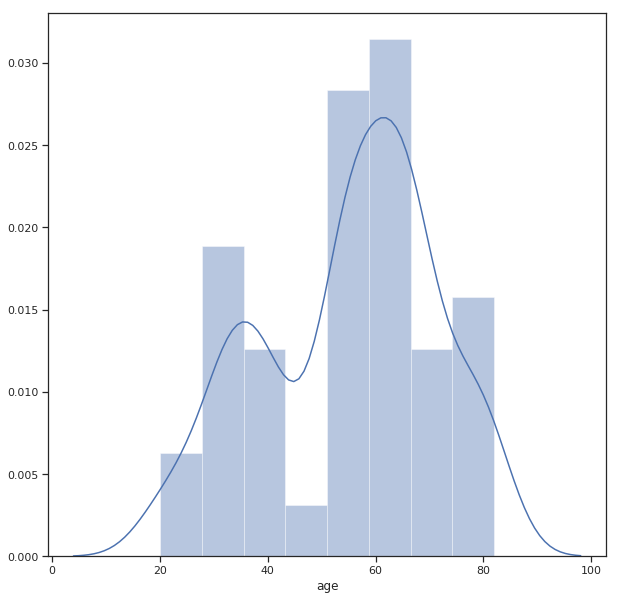

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['age'])

### Jointplot

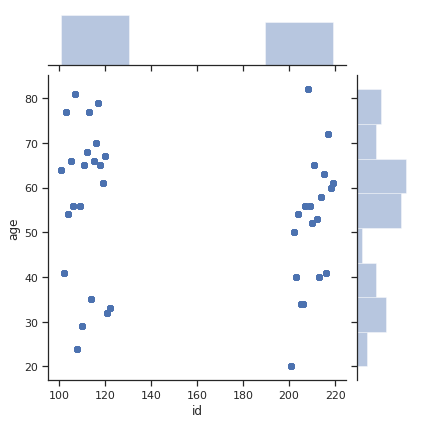

In [12]:
sns.jointplot(x='id', y='age', data=data)

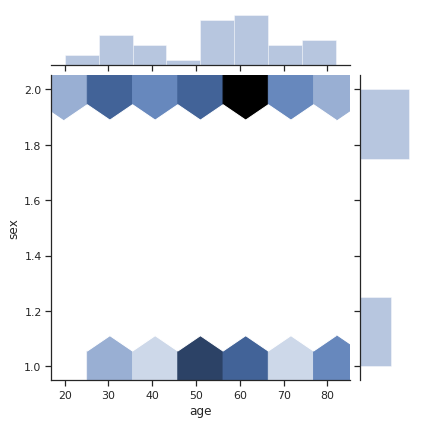

In [13]:
sns.jointplot(x='age', y='sex', data=data, kind="hex")

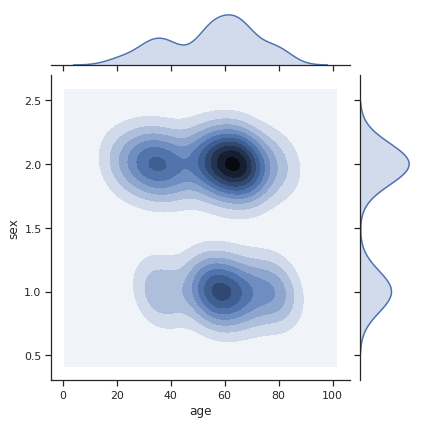

In [14]:
sns.jointplot(x='age', y='sex', data=data, kind="kde")

### Парные диаграмы

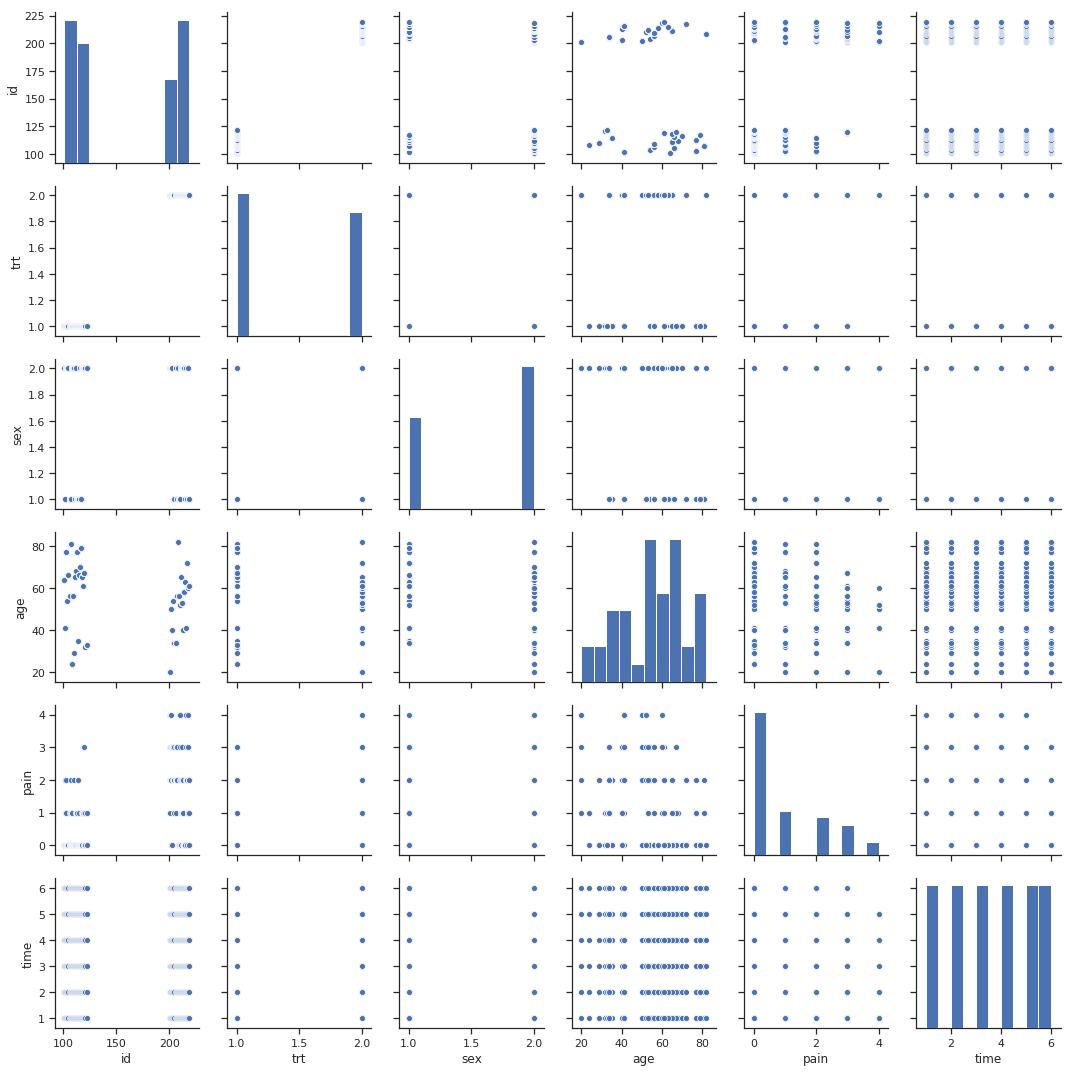

In [15]:
sns.pairplot(data)

In [16]:
#тут eror
#sns.pairplot(data, hue="sex")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)

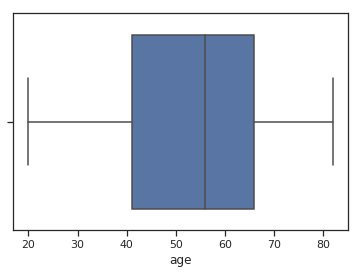

In [17]:
sns.boxplot(x=data['age'])

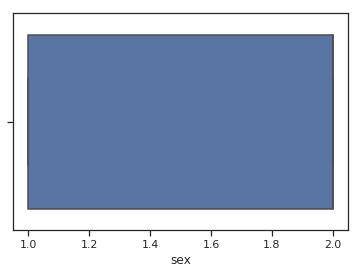

In [18]:
sns.boxplot(x=data['sex'])

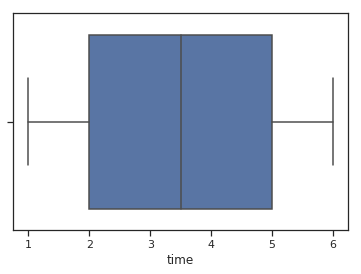

In [19]:
sns.boxplot(x=data['time'])

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

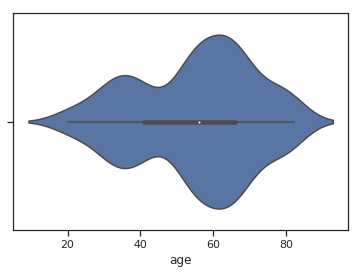

In [20]:
sns.violinplot(x=data['age'])

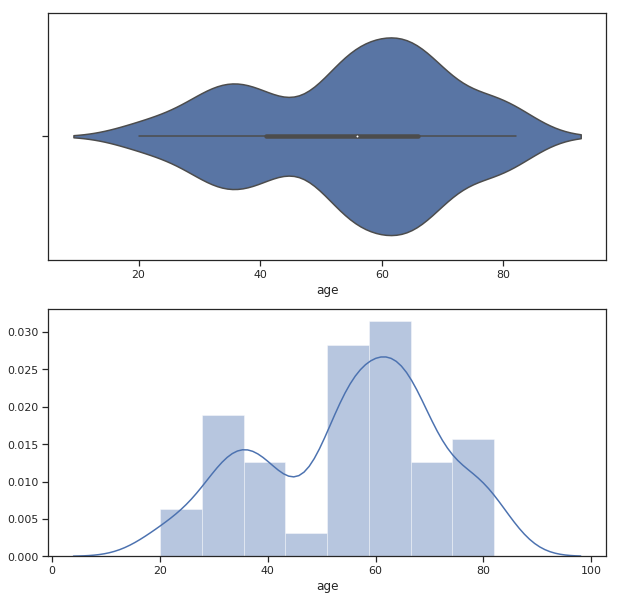

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['age'])
sns.distplot(data['age'], ax=ax[1])

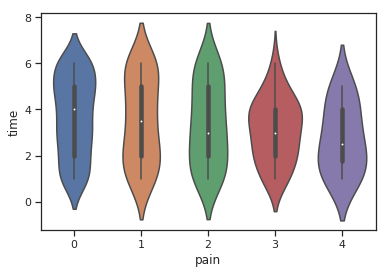

In [22]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='pain', y='time', data=data)

# 4) Информация о корреляции признаков

In [23]:
data.corr()

,id,trt,sex,age,pain,time
id,1.000000,0.992723,-0.057256,-0.149413,0.471855,0.000000
trt,0.992723,1.000000,-0.058694,-0.166990,0.480666,0.000000
sex,-0.057256,-0.058694,1.000000,-0.208911,0.002921,0.000000
age,-0.149413,-0.166990,-0.208911,1.000000,-0.269069,0.000000
pain,0.471855,0.480666,0.002921,-0.269069,1.000000,-0.146326
time,0.000000,0.000000,0.000000,0.000000,-0.146326,1.000000


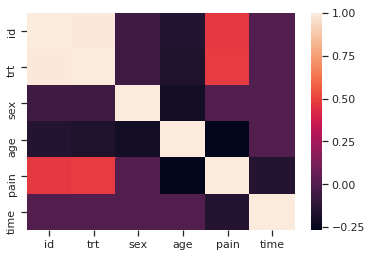

In [24]:
sns.heatmap(data.corr())

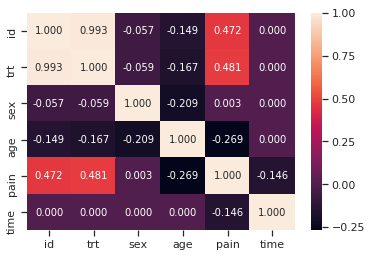

In [25]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

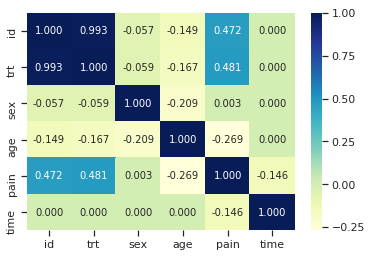

In [26]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

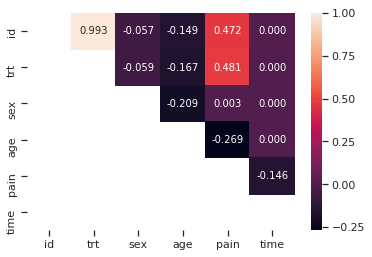

In [28]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

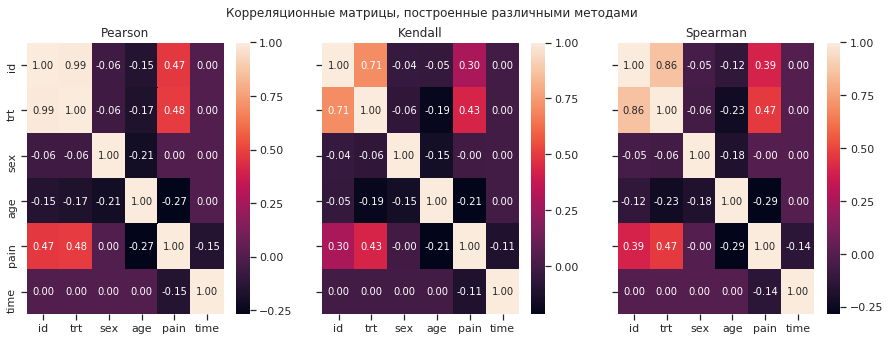

In [29]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')